In [1]:
import requests
import json

dataset_id = 'EC6945'

url = f"https://www.simem.co/backend-files/api/detalle-datos-publicos?datasetId={dataset_id}"
response = requests.get(url)
print(json.loads(response.content))

{'parameters': {'idDataset': 'EC6945', 'startDate': '2026-01-17', 'endDate': '2026-01-17', 'columnDestinyName': None, 'values': None}, 'success': True, 'result': {'idDataset': 'EC6945', 'name': 'Precio de bolsa horario', 'metadata': {'description': 'Precio de bolsa horario nacional, internacional y TIE', 'creationDate': '2023-10-02 21:36:52', 'lastUpdate': '2026-01-20 10:36:27', 'nextUpdateDate': '2026-01-21 10:00:00', 'entity': 'XM', 'category': 'Precio de bolsa horario', 'periodicity': 'Diaria', 'granularity': 'Horaria', 'historicData': 'NA', 'private': False, 'ultimaNovedad': None}, 'filterDate': 'FechaHora', 'records': None, 'variables': [{'variableCode': 'PB_Tie', 'variableName': 'Precio de bolsa TIE', 'measurementUnit': 'COP/kWh', 'description': ' precio de bolsa TIE (Ecuador)'}, {'variableCode': 'PB_Nal', 'variableName': 'Precio de bolsa nacional', 'measurementUnit': 'COP/kWh', 'description': 'Precio de bolsa nacional'}, {'variableCode': 'PB_Int', 'variableName': 'Precio de bols

In [2]:
import requests
import json

dataset_id = 'EC6945'
start_date = '2025-12-01'
end_date = '2025-12-31'

parameters = []

buffer = ""
url =  f"https://www.simem.co/backend-files/api/datos-publicos?datasetId={dataset_id}&startDate={start_date}&endDate={end_date}"
# API con streaming de datos. Realiza una solicitud POST a la URL 
buffer = ""
# Realiza la solicitud POST con streaming
with requests.post(url, json=parameters, stream=True) as response:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            buffer += chunk.decode('utf-8')
# Intenta parsear el JSON completo al final
try:
    data = json.loads(buffer)
    # Muestra cada registro en una fila sin formato
    for i, record in enumerate(data, 1):
        print(f"{json.dumps(record, ensure_ascii=False)}")
except json.JSONDecodeError as e:
    print("Failed to parse JSON:", e)

{"CodigoVariable": "PB_Nal", "FechaHora": "2025-12-11T13:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TXF", "Valor": 243.8783}
{"CodigoVariable": "PB_Int", "FechaHora": "2025-12-11T23:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TXF", "Valor": 233.4907}
{"CodigoVariable": "PB_Nal", "FechaHora": "2025-12-11T04:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TXR", "Valor": 115.8885}
{"CodigoVariable": "PB_Int", "FechaHora": "2025-12-11T19:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TX2", "Valor": 300.0}
{"CodigoVariable": "PB_Tie", "FechaHora": "2025-12-11T20:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TXF", "Valor": 303.4907}
{"CodigoVariable": "PB_Nal", "FechaHora": "2025-12-11T17:00:00", "CodigoDuracion": "PT1H", "UnidadMedida": "COP/kWh", "Version": "TXR", "Valor": 312.8885}
{"CodigoVariable": "PB_Tie", "FechaHora": "2025-12-11T19:00:00", "CodigoD

In [3]:
data

[{'CodigoVariable': 'PB_Nal',
  'FechaHora': '2025-12-11T13:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TXF',
  'Valor': 243.8783},
 {'CodigoVariable': 'PB_Int',
  'FechaHora': '2025-12-11T23:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TXF',
  'Valor': 233.4907},
 {'CodigoVariable': 'PB_Nal',
  'FechaHora': '2025-12-11T04:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TXR',
  'Valor': 115.8885},
 {'CodigoVariable': 'PB_Int',
  'FechaHora': '2025-12-11T19:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TX2',
  'Valor': 300.0},
 {'CodigoVariable': 'PB_Tie',
  'FechaHora': '2025-12-11T20:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TXF',
  'Valor': 303.4907},
 {'CodigoVariable': 'PB_Nal',
  'FechaHora': '2025-12-11T17:00:00',
  'CodigoDuracion': 'PT1H',
  'UnidadMedida': 'COP/kWh',
  'Version': 'TXR',
  'Valor': 312.8885},
 

In [4]:
len(data)

8928

In [5]:
# Convertimos a DataFrame de pandas
import pandas as pd
df = pd.DataFrame(data)
df.head()

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
0,PB_Nal,2025-12-11T13:00:00,PT1H,COP/kWh,TXF,243.8783
1,PB_Int,2025-12-11T23:00:00,PT1H,COP/kWh,TXF,233.4907
2,PB_Nal,2025-12-11T04:00:00,PT1H,COP/kWh,TXR,115.8885
3,PB_Int,2025-12-11T19:00:00,PT1H,COP/kWh,TX2,300.0000
4,PB_Tie,2025-12-11T20:00:00,PT1H,COP/kWh,TXF,303.4907


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CodigoVariable  8928 non-null   object 
 1   FechaHora       8928 non-null   object 
 2   CodigoDuracion  8928 non-null   object 
 3   UnidadMedida    8928 non-null   object 
 4   Version         8928 non-null   object 
 5   Valor           8928 non-null   float64
dtypes: float64(1), object(5)
memory usage: 418.6+ KB


In [7]:
# Convertimos la columna de 'FechaHora' a tipo datetime
df['FechaHora'] = pd.to_datetime(df['FechaHora'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoVariable  8928 non-null   object        
 1   FechaHora       8928 non-null   datetime64[ns]
 2   CodigoDuracion  8928 non-null   object        
 3   UnidadMedida    8928 non-null   object        
 4   Version         8928 non-null   object        
 5   Valor           8928 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 418.6+ KB


In [8]:
df.head(10)

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
0,PB_Nal,2025-12-11 13:00:00,PT1H,COP/kWh,TXF,243.8783
1,PB_Int,2025-12-11 23:00:00,PT1H,COP/kWh,TXF,233.4907
2,PB_Nal,2025-12-11 04:00:00,PT1H,COP/kWh,TXR,115.8885
3,PB_Int,2025-12-11 19:00:00,PT1H,COP/kWh,TX2,300.0000
4,PB_Tie,2025-12-11 20:00:00,PT1H,COP/kWh,TXF,303.4907
5,PB_Nal,2025-12-11 17:00:00,PT1H,COP/kWh,TXR,312.8885
6,PB_Tie,2025-12-11 19:00:00,PT1H,COP/kWh,TX2,300.0000
7,PB_Tie,2025-12-11 00:00:00,PT1H,COP/kWh,TXF,106.4907
8,PB_Nal,2025-12-11 20:00:00,PT1H,COP/kWh,TXF,312.8783
9,PB_Tie,2025-12-11 19:00:00,PT1H,COP/kWh,TXR,303.5013


In [9]:
df["Version"].unique()

array(['TXF', 'TXR', 'TX2', 'TX1'], dtype=object)

In [10]:
df.describe()

,FechaHora,Valor
count,8928,8928.00000
mean,2025-12-16 11:30:00,279.12031
min,2025-12-01 00:00:00,94.56200
25%,2025-12-08 17:45:00,233.49070
50%,2025-12-16 11:30:00,279.86000
75%,2025-12-24 05:15:00,337.51100
max,2025-12-31 23:00:00,553.50130
std,NaN,94.44953


In [11]:
# Filtramos para obtener los datos de la versíon TX1
df_tx1 = df[df['Version'] == 'TX1']
df_tx1.head()

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
10,PB_Int,2025-12-11 01:00:00,PT1H,COP/kWh,TX1,102.0000
20,PB_Int,2025-12-11 09:00:00,PT1H,COP/kWh,TX1,230.0000
22,PB_Nal,2025-12-11 05:00:00,PT1H,COP/kWh,TX1,239.7597
23,PB_Nal,2025-12-11 23:00:00,PT1H,COP/kWh,TX1,239.7597
28,PB_Nal,2025-12-11 16:00:00,PT1H,COP/kWh,TX1,299.7597


In [12]:
df_tx1.describe()

,FechaHora,Valor
count,2232,2232.000000
mean,2025-12-16 11:30:00.000000256,277.572719
min,2025-12-01 00:00:00,94.562000
25%,2025-12-08 17:45:00,230.000000
50%,2025-12-16 11:30:00,279.860000
75%,2025-12-24 05:15:00,337.214900
max,2025-12-31 23:00:00,550.000000
std,NaN,94.339132


In [13]:
df_tx1

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
10,PB_Int,2025-12-11 01:00:00,PT1H,COP/kWh,TX1,102.0000
20,PB_Int,2025-12-11 09:00:00,PT1H,COP/kWh,TX1,230.0000
22,PB_Nal,2025-12-11 05:00:00,PT1H,COP/kWh,TX1,239.7597
23,PB_Nal,2025-12-11 23:00:00,PT1H,COP/kWh,TX1,239.7597
28,PB_Nal,2025-12-11 16:00:00,PT1H,COP/kWh,TX1,299.7597
...,...,...,...,...,...,...
8910,PB_Nal,2025-12-10 02:00:00,PT1H,COP/kWh,TX1,106.7709
8912,PB_Int,2025-12-10 15:00:00,PT1H,COP/kWh,TX1,269.9038
8913,PB_Tie,2025-12-10 02:00:00,PT1H,COP/kWh,TX1,94.5658
8924,PB_Nal,2025-12-10 13:00:00,PT1H,COP/kWh,TX1,202.2089


In [14]:
df_tx1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 10 to 8925
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoVariable  2232 non-null   object        
 1   FechaHora       2232 non-null   datetime64[ns]
 2   CodigoDuracion  2232 non-null   object        
 3   UnidadMedida    2232 non-null   object        
 4   Version         2232 non-null   object        
 5   Valor           2232 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 122.1+ KB


In [15]:
# Veamos los valores únicos de cada columna que sea tipo objeto
for col in df_tx1.select_dtypes(include=['object']).columns:
    unique_values = df_tx1[col].unique()
    print(f"Columna: {col}, Valores únicos: {unique_values}")

Columna: CodigoVariable, Valores únicos: ['PB_Int' 'PB_Nal' 'PB_Tie']
Columna: CodigoDuracion, Valores únicos: ['PT1H']
Columna: UnidadMedida, Valores únicos: ['COP/kWh']
Columna: Version, Valores únicos: ['TX1']


In [20]:
df_tx1.describe()

,FechaHora,Valor
count,2232,2232.000000
mean,2025-12-16 11:30:00.000000256,277.572719
min,2025-12-01 00:00:00,94.562000
25%,2025-12-08 17:45:00,230.000000
50%,2025-12-16 11:30:00,279.860000
75%,2025-12-24 05:15:00,337.214900
max,2025-12-31 23:00:00,550.000000
std,NaN,94.339132


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

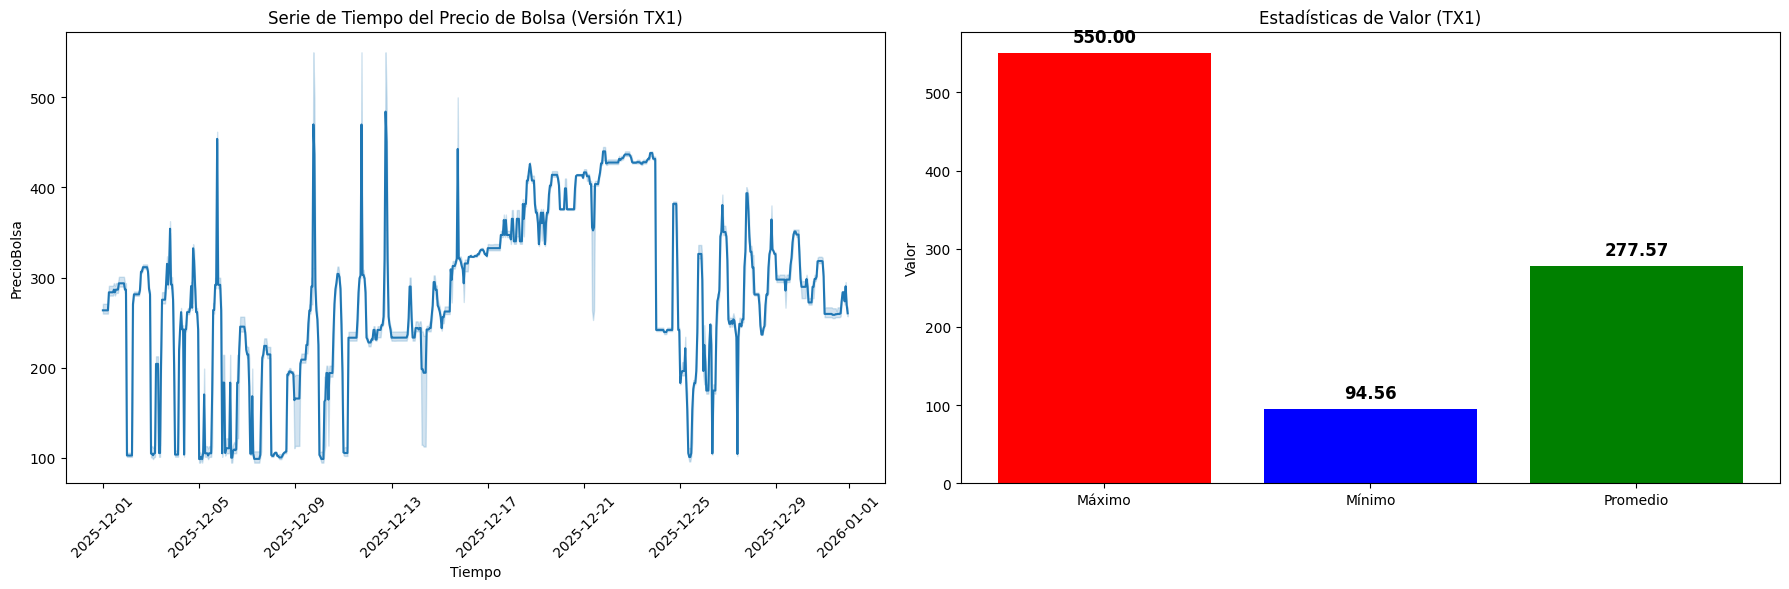

In [ ]:
y = df_tx1['Valor']
x = df_tx1['FechaHora']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Serie de tiempo
sns.lineplot(ax=axes[0], x=x, y=y)
axes[0].set_title('Serie de Tiempo del Precio de Bolsa (Versión TX1)')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Precio Bolsa [COP]')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart de max, min y mean
stats = {
    'Máximo': y.max(),
    'Mínimo': y.min(),
    'Promedio': y.mean()
}
bars = axes[1].bar(stats.keys(), stats.values(), color=['red', 'blue', 'green'])
axes[1].set_title('Estadísticas de Valor (TX1)')
axes[1].set_ylabel('Valor')

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

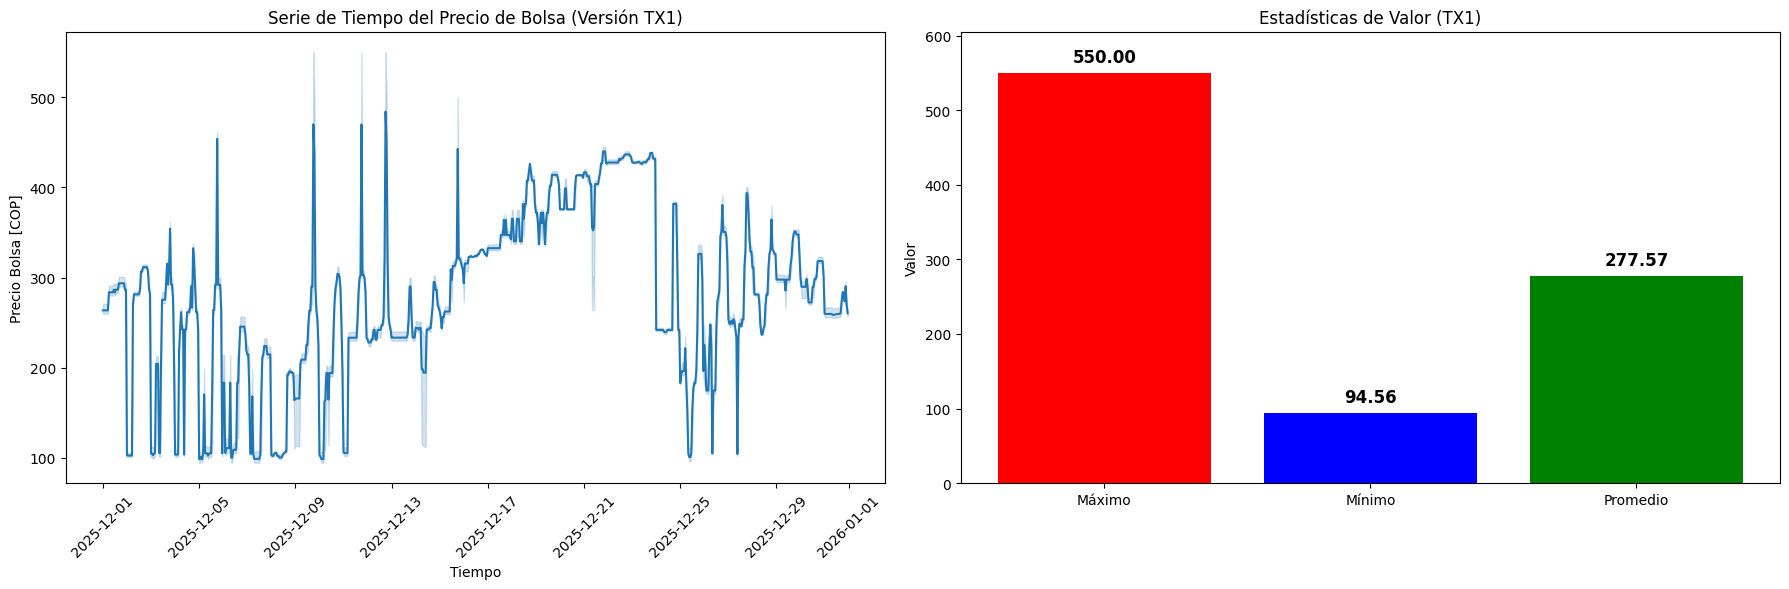

In [23]:
y = df_tx1['Valor']
x = df_tx1['FechaHora']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Serie de tiempo
sns.lineplot(ax=axes[0], x=x, y=y)
axes[0].set_title('Serie de Tiempo del Precio de Bolsa (Versión TX1)')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Precio Bolsa [COP]')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart de max, min y mean
stats = {
    'Máximo': y.max(),
    'Mínimo': y.min(),
    'Promedio': y.mean()
}
bars = axes[1].bar(stats.keys(), stats.values(), color=['red', 'blue', 'green'])
axes[1].set_title('Estadísticas de Valor (TX1)')
axes[1].set_ylabel('Valor')

# Ajustar el límite superior del eje y para dar espacio al texto
axes[1].set_ylim(0, y.max() * 1.1)  # Añade 10% de margen superior

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

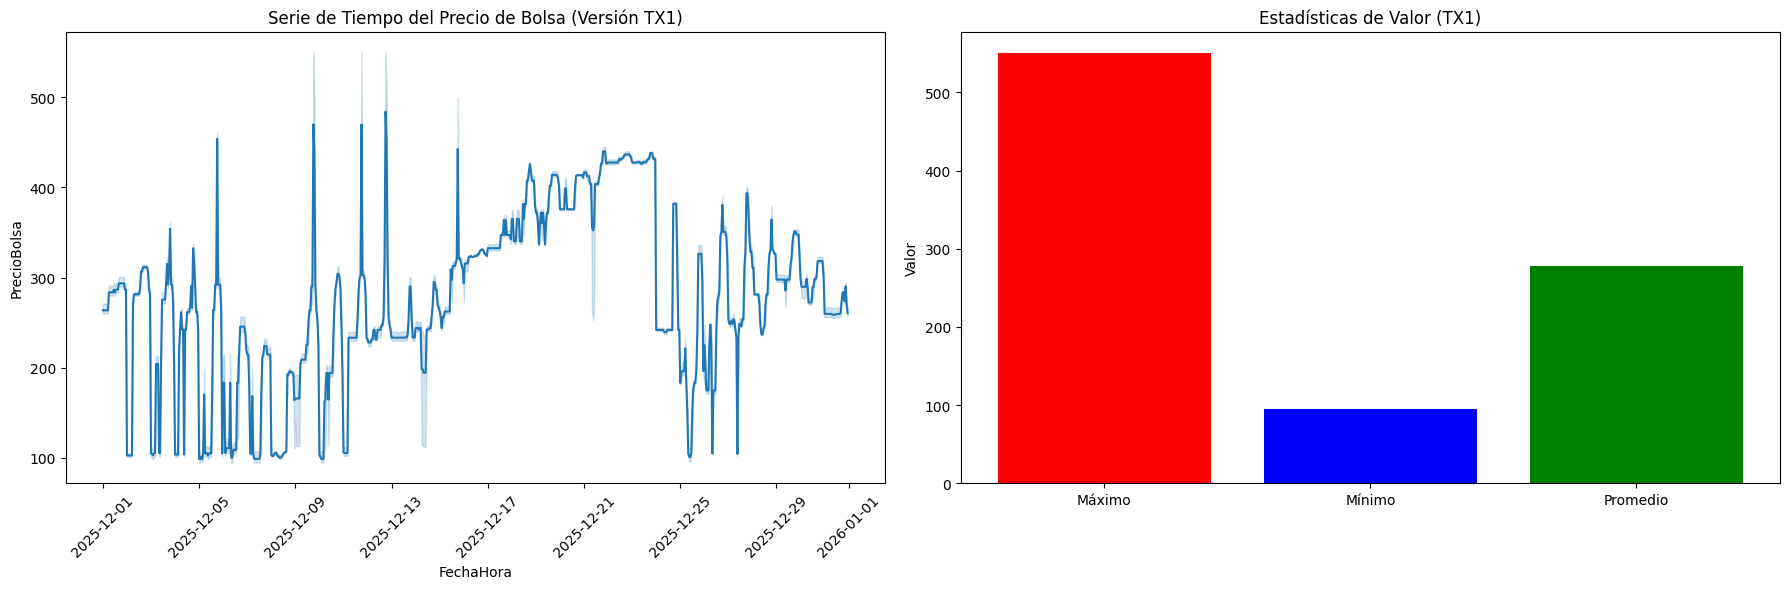

In [19]:
y = df_tx1['Valor']
x = df_tx1['FechaHora']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Serie de tiempo
sns.lineplot(ax=axes[0], x=x, y=y)
axes[0].set_title('Serie de Tiempo del Precio de Bolsa (Versión TX1)')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('PrecioBolsa')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart de max, min y mean
stats = {
    'Máximo': y.max(),
    'Mínimo': y.min(),
    'Promedio': y.mean()
}
axes[1].bar(stats.keys(), stats.values(), color=['red', 'blue', 'green'])
axes[1].set_title('Estadísticas de Valor (TX1)')
axes[1].set_ylabel('Valor')

plt.tight_layout()
plt.show()

In [24]:
# Sobre el dataset ahora vamos a determinar las tres horas del día con mayor precio de bolsa
# y las tres horas del día con menor precio de bolsa, para hacer una tabla

top_3_max = df_tx1.nlargest(3, 'Valor')[['FechaHora', 'Valor']]
bottom_3_min = df_tx1.nsmallest(3, 'Valor')[['FechaHora', 'Valor']]

top_3_max, bottom_3_min

(               FechaHora  Valor
 49   2025-12-11 18:00:00  550.0
 210  2025-12-11 18:00:00  550.0
 1770 2025-12-12 18:00:00  550.0,
               FechaHora   Valor
 338 2025-12-07 07:00:00  94.562
 401 2025-12-07 12:00:00  94.562
 432 2025-12-07 08:00:00  94.562)

In [31]:
# Reemplazamos nombre de las columnas
new_names = {"FechaHora": "Fecha", "Valor": "Precio de Bolsa COP/kW"}
top_3_max.rename(columns=new_names, inplace=True)
bottom_3_min.rename(columns=new_names, inplace=True)

In [32]:
top_3_max

,Fecha,Precio de Bolsa COP/kW
49,2025-12-11 18:00:00,550.0
210,2025-12-11 18:00:00,550.0
1770,2025-12-12 18:00:00,550.0


In [33]:
bottom_3_min

,Fecha,Precio de Bolsa COP/kW
338,2025-12-07 07:00:00,94.562
401,2025-12-07 12:00:00,94.562
432,2025-12-07 08:00:00,94.562


In [ ]:
#

## Guardamos datos

In [28]:
df_tx1

,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
10,PB_Int,2025-12-11 01:00:00,PT1H,COP/kWh,TX1,102.0000
20,PB_Int,2025-12-11 09:00:00,PT1H,COP/kWh,TX1,230.0000
22,PB_Nal,2025-12-11 05:00:00,PT1H,COP/kWh,TX1,239.7597
23,PB_Nal,2025-12-11 23:00:00,PT1H,COP/kWh,TX1,239.7597
28,PB_Nal,2025-12-11 16:00:00,PT1H,COP/kWh,TX1,299.7597
...,...,...,...,...,...,...
8910,PB_Nal,2025-12-10 02:00:00,PT1H,COP/kWh,TX1,106.7709
8912,PB_Int,2025-12-10 15:00:00,PT1H,COP/kWh,TX1,269.9038
8913,PB_Tie,2025-12-10 02:00:00,PT1H,COP/kWh,TX1,94.5658
8924,PB_Nal,2025-12-10 13:00:00,PT1H,COP/kWh,TX1,202.2089


In [36]:
# Guardar el .csv con los datos filtrados de la versión TX1
df_tx1.to_csv('../data/exercise_1/datos_tx1.csv', index=False)
top_3_max.to_csv('../data/exercise_1/top_3_max.csv', index=False)
bottom_3_min.to_csv('../data/exercise_1/bottom_3_min.csv', index=False)